In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data_dir = r"../data/raw/RawData.xlsx"

In [5]:
raw = pd.read_excel(data_dir,sheet_name="HangSeng Index Data")

In [6]:
raw.head()

,Ntime,Time,Closing Price,Open Price,High price,Low Price,Volume,MACD,CCI,ATR,...,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD,US Dollar Index,HIBOR
0,20080702,733591,21704.4492,21785.3906,21938.1992,21555.5293,254858.26,-646.053200,-193.115118,546.4805,...,22956.709411,22497.96286,-751.5703,22187.92768,-887.8516,-5.754486,-0.069509,-401619.369837,71.99,1.6
1,20080703,733592,21242.7793,21389.4902,21742.0703,21163.5703,272528.48,-702.282620,-186.955957,578.5000,...,22793.477972,22289.66071,-1392.3806,21909.45156,-1786.9102,-7.872373,-0.068201,-507305.257079,72.73,1.6
2,20080704,733593,21423.8203,21402.1699,21534.0508,21344.8496,179634.42,-723.891770,-133.742667,291.2715,...,22663.034384,22152.28180,-1031.8496,21703.08164,-1634.1699,-8.153977,-0.058111,-398848.614015,72.71,1.6
3,20080707,733596,21913.0605,21402.6992,21916.2109,21402.6992,196457.92,-693.544830,-77.445777,513.5117,...,22591.608300,22069.02789,-129.2891,21677.22382,-1412.7403,-3.880007,-0.035303,-264228.169678,72.71,1.6
4,20080708,733597,21220.8105,21632.6992,21684.2109,21098.8398,201519.68,-717.087314,-108.634123,814.2207,...,22461.056128,21919.61285,-881.1993,21500.98396,-1576.7989,-6.703666,-0.055006,-518512.844172,72.96,1.6


### Wavelet transform
two level wavelet transformation with harr function applied twice

In [5]:
import pywt
from pywt import wavedec, waverec
from statsmodels.robust import mad

def waveletSmooth( x, wavelet="haar", level=2, declevel=2):
    # calculate the wavelet coefficients
    coeff = pywt.wavedec( x, wavelet, mode='periodization',level=declevel,axis=0 )
    # calculate a threshold
    sigma = mad(coeff[-level])
    #print("sigma: ",sigma)
    uthresh = sigma * np.sqrt( 2*np.log( len( x ) ) )
    coeff[1:] = ( pywt.threshold( i, value=uthresh, mode="hard" ) for i in coeff[1:] )
    # reconstruct the signal using the thresholded coefficients
    y = pywt.waverec( coeff, wavelet, mode='periodization',axis=0 )
   
    return y
    #return y,sigma,uthresh

In [ ]:
raw['Closing Price'].plot()

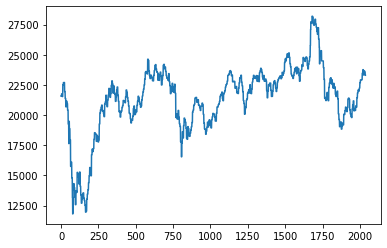

In [7]:
smooth = waveletSmooth(raw['Closing Price'])
plt.plot(smooth)

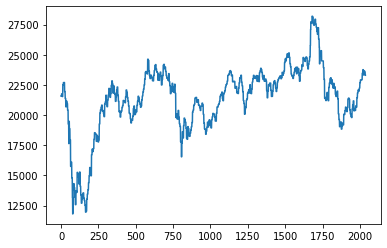

In [8]:
smooth2 = waveletSmooth(smooth)
plt.plot(smooth)

In [12]:
raw.head().apply(waveletSmooth, axis=0).apply(waveletSmooth, axis=0)

,Ntime,Time,Closing Price,Open Price,High price,Low Price,Volume,MACD,CCI,ATR,...,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD,US Dollar Index,HIBOR
0,20080704.0,733593.0,21801.862275,21692.887675,21782.63280,21562.6416,225869.77,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.2724,21869.421175,-980.8887,-5.356268,-0.057781,-393000.352652,72.165,1.6
1,20080704.0,733593.0,21340.192375,21296.987275,21782.63280,21170.6826,225869.77,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.2724,21869.421175,-1879.9473,-7.474154,-0.057781,-393000.352652,72.905,1.6
2,20080704.0,733593.0,21326.407225,21494.937475,21591.55275,21337.7373,225869.77,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.2724,21869.421175,-1430.4180,-8.552196,-0.057781,-393000.352652,72.535,1.6
3,20080704.0,733593.0,21815.647425,21494.937475,21973.71285,21395.5869,225869.77,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.2724,21869.421175,-1430.4180,-4.278226,-0.057781,-393000.352652,72.535,1.6
4,20080708.0,733597.0,21220.810500,21632.699200,21684.21090,21098.8398,201519.68,-717.087314,-108.634123,814.220700,...,22461.056128,21919.612850,-881.1993,21500.983960,-1576.7989,-6.703666,-0.055006,-518512.844172,72.960,1.6
5,20080708.0,733597.0,21220.810500,21632.699200,21684.21090,21098.8398,201519.68,-717.087314,-108.634123,814.220700,...,22461.056128,21919.612850,-881.1993,21500.983960,-1576.7989,-6.703666,-0.055006,-518512.844172,72.960,1.6


In [13]:
data = raw.apply(waveletSmooth, axis=0).apply(waveletSmooth, axis=0)

In [14]:
data

,Ntime,Time,Closing Price,Open Price,High price,Low Price,Volume,MACD,CCI,ATR,...,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD,US Dollar Index,HIBOR
0,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.60
1,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.60
2,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.60
3,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,482.440925,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.60
4,20080709.5,733598.5,21758.237775,21692.567375,21971.105475,21472.679675,234556.975,-654.598880,-46.457574,633.428250,...,22382.993209,21823.400168,-29.57425,21612.124680,-920.309575,-3.880303,-0.028366,-251533.682437,72.4875,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,20160927.5,736600.5,23562.235000,23548.797500,23664.445000,23387.402500,164989.815,215.596600,-9.939365,307.787500,...,23415.814661,23509.812750,76.77250,23593.106500,-200.627500,-1.359532,0.012864,242033.939874,95.4233,0.16
2034,20160927.5,736600.5,23562.235000,23548.797500,23664.445000,23387.402500,164989.815,215.596600,-9.939365,307.787500,...,23415.814661,23509.812750,76.77250,23593.106500,-200.627500,-1.359532,0.012864,242033.939874,95.4233,0.16
2035,20160927.5,736600.5,23562.235000,23548.797500,23664.445000,23387.402500,164989.815,215.596600,-9.939365,307.787500,...,23415.814661,23509.812750,76.77250,23593.106500,-200.627500,-1.359532,0.012864,242033.939874,95.4233,0.16
2036,20160930.0,736603.0,23297.150000,23435.290000,23484.370000,23239.360000,167484.270,173.747805,-78.490429,500.110000,...,23438.355631,23574.358000,-462.65000,23509.218000,81.390000,0.028123,-0.010756,130773.724754,95.4426,0.16


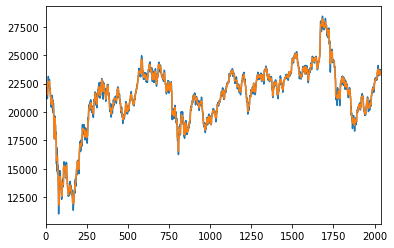

In [16]:
# 两次小波变换之后确实平滑很多
raw['Closing Price'].plot()
data['Closing Price'].plot()

In [27]:
data.head()

,Unnamed: 0,Ntime,Time,Closing Price,Open Price,High price,Low Price,Volume,MACD,CCI,...,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD,US Dollar Index,HIBOR
0,0,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.6
1,1,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.6
2,2,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.6
3,3,20080704.0,733593.0,21571.027325,21494.937475,21782.632800,21366.662100,225869.770,-691.443105,-147.814880,...,22751.207516,22252.233315,-826.27240,21869.421175,-1430.418000,-6.415211,-0.057781,-393000.352652,72.5350,1.6
4,4,20080709.5,733598.5,21758.237775,21692.567375,21971.105475,21472.679675,234556.975,-654.598880,-46.457574,...,22382.993209,21823.400168,-29.57425,21612.124680,-920.309575,-3.880303,-0.028366,-251533.682437,72.4875,1.6


In [151]:
#data.to_csv('test.csv')
data = pd.read_csv('test.csv', index_col=0)
X_train = np.array(data.drop(columns=['Ntime','Time'], axis=1).values,dtype=np.float32)

In [8]:
X_train.shape

(2038, 19)

In [123]:
 X_train.max(axis=0)

(19,)

#### Normalization

In [153]:
X_train = (X_train - X_train.min(axis=0))/(X_train.max(axis=0)-X_train.min(axis=0))
X_train

array([[0.5959627 , 0.58786315, 0.59460324, ..., 0.54666203, 0.02112947,
        0.5947955 ],
       [0.5959627 , 0.58786315, 0.59460324, ..., 0.54666203, 0.02112947,
        0.5947955 ],
       [0.5959627 , 0.58786315, 0.59460324, ..., 0.54666203, 0.02112947,
        0.5947955 ],
       ...,
       [0.7174875 , 0.71193606, 0.7105891 , ..., 0.72165805, 0.83735305,
        0.05947955],
       [0.7013092 , 0.7050791 , 0.6994901 , ..., 0.69099814, 0.8380411 ,
        0.05947955],
       [0.7013092 , 0.7050791 , 0.6994901 , ..., 0.69099814, 0.8380411 ,
        0.05947955]], dtype=float32)

### Stacked Auto Encoder

In [3]:
import tensorflow as tf

In [106]:
np.random.seed(0)
n_inputs = 19
n_hidden = 10
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 1e-4

n_epochs = 20
batch_size = 128
num_train = X_train.shape[0]
n_batches = int(num_train  / batch_size)

In [144]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self,intermidiate_dim=10,name='encoder', sparsity_weight=0, sparsity_target=0.5, l2_reg=1e-3, **kwargs):
        super().__init__(name=name,**kwargs)
        self.dense = tf.keras.layers.Dense(units=intermidiate_dim, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(l=l2_reg))
        self.sparsity_target = sparsity_target
        self.sparsity_weight = sparsity_weight
        
    def call(self, inputs):
        h = self.dense(inputs)
        self.add_loss(self.sparsity_loss(h))
        return h
        
    def sparsity_loss(self, h):
        mean_activation = tf.reduce_mean(h, axis=0)
        return self.sparsity_weight* (tf.keras.losses.KLD(self.sparsity_target, mean_activation) + 
                                      tf.keras.losses.KLD(1-self.sparsity_target, 1-mean_activation)) 


class Decoder(tf.keras.layers.Layer):
    def __init__(self,original_dim, intermidiate_dim=10,name='decoder', l2_reg=1e-3,**kwargs):
        super().__init__(name=name,**kwargs)
        self.outputs = tf.keras.layers.Dense(units=original_dim, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(l=l2_reg))
 
    def call(self, inputs):
        #x = self.dense(inputs)
        return self.outputs(inputs)

class AutoEncoder(tf.keras.Model):
    def __init__(self, original_dim, intermidiate_dim, sparsity_weight = 1e-2, sparsity_target=0.3):
        super().__init__()
        self.encoder = Encoder(intermidiate_dim= intermidiate_dim,
                               sparsity_weight = sparsity_weight,
                               sparsity_target = sparsity_target,
                               l2_reg=l2_reg) 
        
        self.decoder = Decoder(original_dim=original_dim,
                               intermidiate_dim=intermidiate_dim,
                               l2_reg=l2_reg)
    
    def call(self, inputs):
        x = self.encoder(inputs)
        return self.decoder(x)

In [145]:
def train(model, X_inputs):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss_lst = []
    for epoch in range(n_epochs):
            total_loss=0
            for i in range(n_batches):
                sample_idxs = np.random.choice(num_train, batch_size)
                X_batch = X_inputs[sample_idxs,:]
                with tf.GradientTape() as tape:
                    X_rec = model(X_batch)
                    regularization_loss = tf.add_n(model.losses)
                    loss = 0.5 * tf.reduce_sum(tf.square(X_rec - X_batch)) + regularization_loss
                grads = tape.gradient(loss, model.variables)
                optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
                loss_lst.append(loss.numpy())
                total_loss+=loss.numpy()
            #print('{}/{} Average loss per epoch: {}'.format(epoch+1, n_epochs, total_loss/n_batches))
    plt.plot(loss_lst)

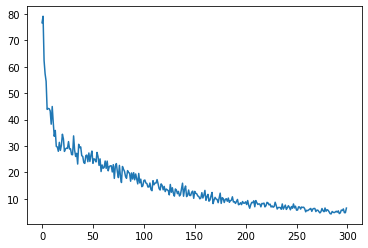

In [154]:
AE1= AutoEncoder(original_dim=n_inputs, intermidiate_dim =10, sparsity_weight = 0.1, sparsity_target=0.5)
train(AE1, X_train)

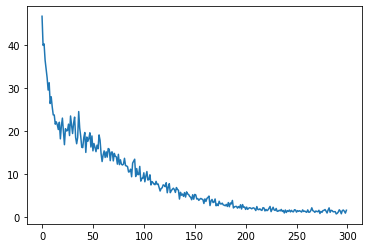

In [155]:
H1 = AE1.encoder(X_train).numpy()
AE2= AutoEncoder(original_dim=10, intermidiate_dim =10, sparsity_weight = 0.1, sparsity_target=0.5)
train(AE2, H1)

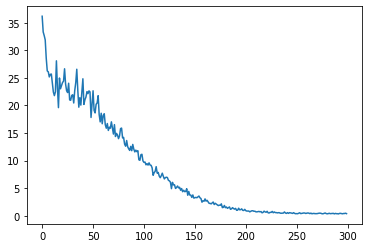

In [156]:
H2 = AE2.encoder(H1).numpy()
AE3= AutoEncoder(original_dim=10, intermidiate_dim =10, sparsity_weight = 0.1, sparsity_target=0.5)
train(AE3, H2)

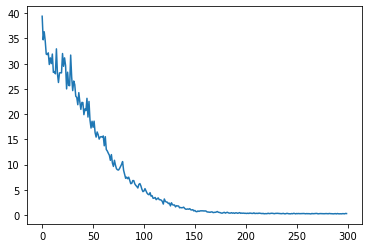

In [157]:
H3 = AE3.encoder(H2).numpy()
AE4= AutoEncoder(original_dim=10, intermidiate_dim =10, sparsity_weight = 0.1, sparsity_target=0.5)
train(AE4, H3)

In [158]:
H4 = AE4.encoder(H3).numpy()

### LSTM

In [169]:
learning_rate= 0.05
batch_size = 60
n_epochs = 5000

n_layers = 5
n_delay = 4

In [172]:
X_lstm = H4[:,:,np.newaxis].astype(np.float32)

In [191]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(64, return_sequences=True,input_shape=(4, 10)))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dense(1, return_sequences=True))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 4, 64)             19200     
_________________________________________________________________
lstm_27 (LSTM)               (None, 4, 64)             33024     
_________________________________________________________________
lstm_28 (LSTM)               (None, 4, 64)             33024     
_________________________________________________________________
lstm_29 (LSTM)               (None, 4, 64)             33024     
_________________________________________________________________
lstm_30 (LSTM)               (None, 4, 1)              264       
Total params: 118,536
Trainable params: 118,536
Non-trainable params: 0
_________________________________________________________________


In [192]:
model.compile(loss='mse', 
                   optimizer='Adam', 
                   metrics=['accuracy'])

In [193]:
model.fit(X_lstm,
          batch_size=batch_size,
          epochs=1)

ValueError: Error when checking input: expected lstm_26_input to have shape (4, 10) but got array with shape (10, 1)

In [187]:
X_lstm.shape

(2038, 10, 1)

In [205]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000
EVALUATION_INTERVAL = 200
EPOCHS = 10


def create_time_steps(length):
    time_steps = []
    for i in range(-length, 0, 1):
        time_steps.append(i)
    return time_steps

def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

# Normalization

In [224]:
dataset  = H4
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std

In [225]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [280]:
dataset[:TRAIN_SPLIT].shape

(1630, 10)

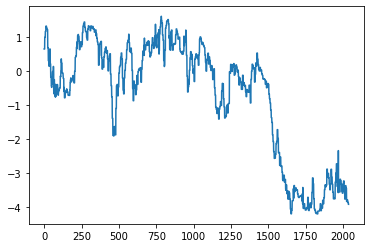

In [296]:
plt.plot(dataset[:,0])

In [314]:
past_history = 4
future_target = 0
STEP = 1
target = X_train[:,0]

x_train_single, y_train_single = multivariate_data(dataset, target, 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, target,
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [315]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (4, 10)


In [316]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

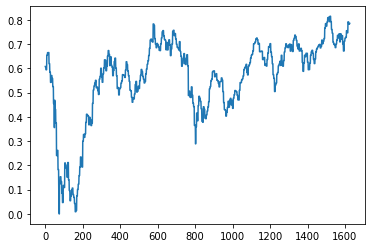

In [317]:
plt.plot(y_train_single)

In [318]:
hidden_size = 100
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(hidden_size,
                                           input_shape=x_train_single.shape[-2:],
                                           return_sequences=True))
single_step_model.add(tf.keras.layers.LSTM(hidden_size,return_sequences=True))
single_step_model.add(tf.keras.layers.LSTM(hidden_size,return_sequences=True))
single_step_model.add(tf.keras.layers.LSTM(hidden_size,return_sequences=True))
single_step_model.add(tf.keras.layers.LSTM(hidden_size))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer='Adam', loss='mae')

In [319]:
single_step_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, 4, 100)            44400     
_________________________________________________________________
lstm_65 (LSTM)               (None, 4, 100)            80400     
_________________________________________________________________
lstm_66 (LSTM)               (None, 4, 100)            80400     
_________________________________________________________________
lstm_67 (LSTM)               (None, 4, 100)            80400     
_________________________________________________________________
lstm_68 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_170 (Dense)            (None, 1)                 101       
Total params: 366,101
Trainable params: 366,101
Non-trainable params: 0
_______________________________________________

In [320]:
for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

(256, 1)


In [321]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 26s 130ms/step - loss: 0.0585 - val_loss: 0.0876
Epoch 2/10
200/200 [==============================] - 11s 56ms/step - loss: 0.0250 - val_loss: 0.0946
Epoch 3/10
200/200 [==============================] - 11s 56ms/step - loss: 0.0232 - val_loss: 0.0756
Epoch 4/10
200/200 [==============================] - 11s 56ms/step - loss: 0.0214 - val_loss: 0.0543
Epoch 5/10
200/200 [==============================] - 11s 57ms/step - loss: 0.0200 - val_loss: 0.0633
Epoch 6/10
200/200 [==============================] - 11s 57ms/step - loss: 0.0196 - val_loss: 0.0615
Epoch 7/10
200/200 [==============================] - 11s 57ms/step - loss: 0.0187 - val_loss: 0.0638
Epoch 8/10
200/200 [==============================] - 11s 57ms/step - loss: 0.0180 - val_loss: 0.0696
Epoch 9/10
200/200 [==============================] - 11s 57ms/step - loss: 0.0171 - val_loss: 0.0687
Epoch 10/10
200/200 [=================

In [ ]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [322]:
pred = single_step_model.predict(x_train_single)

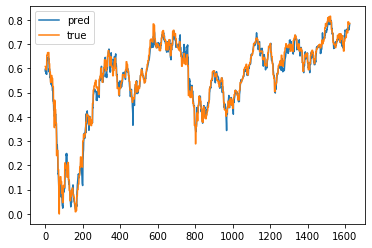

In [342]:
plt.plot(pred,label='pred')
plt.plot(X_train[4:TRAIN_SPLIT,0],label='true')
plt.legend()

### Metrics

In [358]:
def mape(y_true, y_pred):
    out = np.divide(y_true-y_pred, y_true,  where=y_true!=0)
    return np.mean(np.abs(out))

def theil_u(y_true, y_pred):
    def ms(x):
        return np.sqrt(np.mean(np.square(x)))
    return ms(y_true-y_pred)/(ms(y_true)+ms(y_pred))

In [359]:
y_true = X_train[4:TRAIN_SPLIT,0]
y_pred = pred.reshape(-1)

In [360]:
mape(y_true,y_pred)

2.836168e+21

In [363]:
theil_u(y_true,y_pred)

0.019630723

In [362]:
np.corrcoef(y_true,y_pred)

array([[1.       , 0.9911099],
       [0.9911099, 1.       ]])

In [233]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

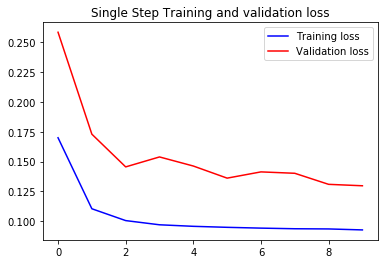